<a href="https://colab.research.google.com/github/xslittlemaggie/ML-DL-Algorithm-Notes/blob/master/Plot%20the%20Classification%20Model%20Boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>绘制分类模型的决策边界<center></h1>

在经行分类模型的可视化时，我们需要绘制分类器的决策边界。我们需要将一个空间类的尽可能的密集的取点，使用分类模型正对这些点进行预测，并将这些预测结果进行可视化

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

# **Step 1**: load dataset

To visualize the data, for this practice, I will only choose 2 features. 

In [0]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

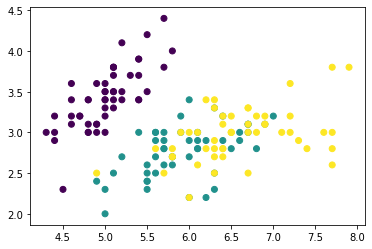

In [216]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [0]:
clf = DecisionTreeClassifier(max_depth = 3).fit(X, y)
#clf = LinearSVC.fit(X, y)
#clf = LogisticRegression().fit(X, y)

## **Step 2**: 对密闭空间画边界

### 1. 得到两个特征的范围：
  - x_range : [x_min, x_max]

  - y_range : [y_min, y_max]


In [0]:
x_min, x_max = X[:, 0].min() - 1,  X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1,  X[:, 1].max() + 1

### 2. 根据这两个范围，取尽可能密集的所有点，根据模型做预测，根据预测结果可视化

  - x 轴所有点： np.arange(x_min, x_max, 步长)

  - y 轴所有点： np.arange(y_min, y_max, 步长)

最后通过np.meshgrid 作所有可能的组合, e.g.:

x = [1, 2, 3]

y = [4, 5]

xx, yy = np.meshgrid(x, y)

**xx --> **

[[1 2 3]

 [1 2 3]]

**yy --> **

[[4 4 4 ]

 [5 5 5]]

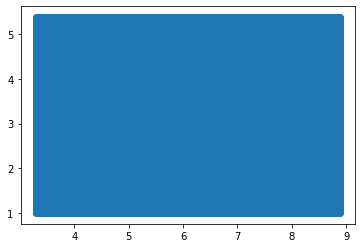

In [219]:
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.scatter(xx, yy)
plt.show()

### 3. 将以上所有的点整理成模型需要的数据类型: xx.ravel(), np.c_[x_1, x_2]
xx --> x1

yy --> x2

|x1|x2|
|--|--|
|1|4|
|2|4|
|3|4|
|1|5|
|2|5|
|3|5|

In [0]:
x_1 = xx.ravel()
x_2 = yy.ravel()

### 4. 对所有的点进行预测

In [0]:
Z = clf.predict(np.c_[x_1, x_2]) # predicted value of all points from the above grid
Z_reshape = Z.reshape(xx.shape)

#### 1). 通过点对边界

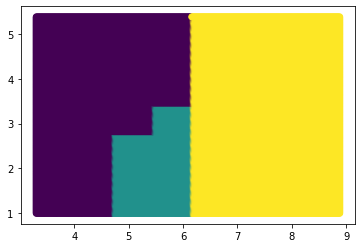

In [222]:
plt.scatter(x_1, x_2, c = Z)
plt.show()

#### 2). 通过面画边界, contour

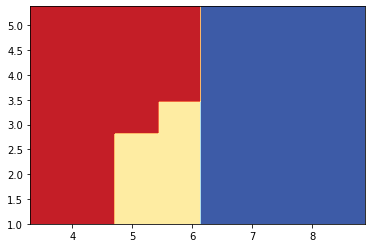

In [223]:
plt.contourf(xx, yy, Z_reshape, cmap = plt.cm.RdYlBu)
plt.show()

## **Step 3**: 将数据的点画到边界图上，看分类是否正确

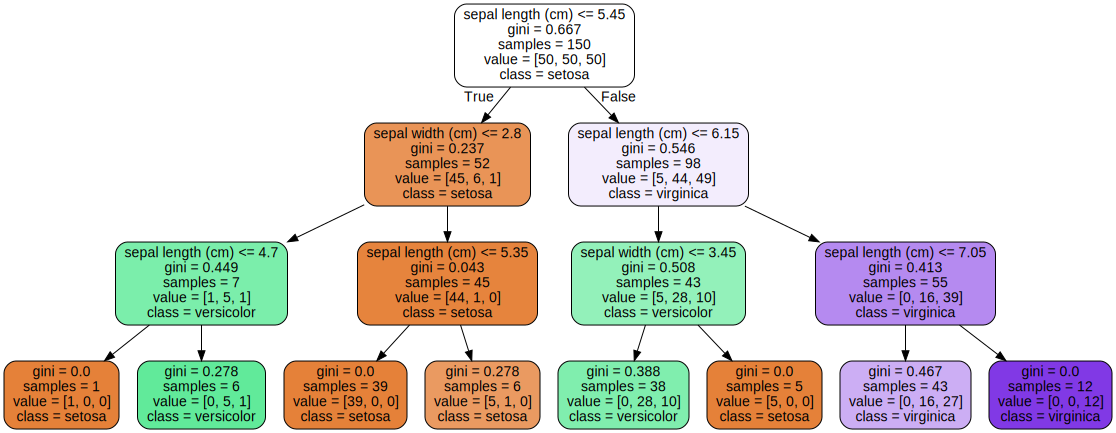

In [224]:
import graphviz
from sklearn.tree import export_graphviz
feature_names = iris.feature_names[:2]

dot_data = export_graphviz(clf
                           ,feature_names = feature_names
                          ,class_names = iris.target_names 
                          ,filled = True
                          ,rounded = True
                          )
graph = graphviz.Source(dot_data)
graph

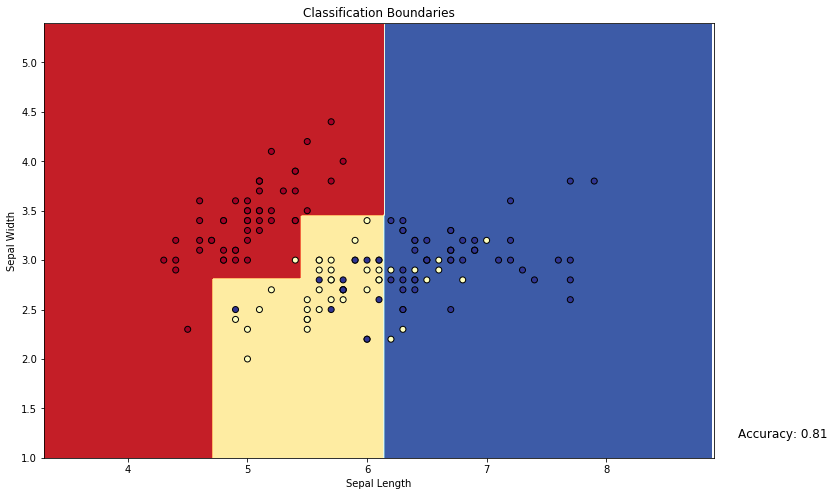

In [225]:
plt.figure(figsize = (12, 8))
plt.contourf(xx, yy, Z_reshape, cmap = plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolors = "k", cmap = plt.cm.RdYlBu)
# add the tree boundary

# 1. 
#plt.axvline(x=5.45, color='black', linestyle='--')

# 2. 
#plt.axhline(y=2.8, color='black', linestyle='--')

# 3.
#plt.axvline(x=6.15, color='black', linestyle='--')

# 4.
#plt.axvline(x=4.7, color='black', linestyle='--')

# 5. 
#plt.axvline(x=5.35, color='black', linestyle='--')  # 通过这一个节点，两个分类是一样的

# 6. 
#plt.axhline(y=3.45, color='black', linestyle='--')

# 7. 
#plt.axvline(x=7.05, color='black', linestyle='--') # 通过这一个节点，两个分类是一样的

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("Classification Boundaries")
plt.text(x_max + 0.2, y_min + 0.2, "Accuracy: {:.2f}".format(clf.score(X, y)), size = 12)
plt.show()

# Reference:
URL_1 = "https://blog.csdn.net/qinhanmin2010/article/details/65692760